## Task 2: Approximating linear vector fields

In [61]:
from helpers.data import load_dataset
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [9]:
#load data

x_0 = load_dataset("data/linear_vectorfield_data_x0.txt")
x_1 = load_dataset("data/linear_vectorfield_data_x1.txt")

In [10]:
print(x_0.shape)
print(x_1.shape)

(1000, 2)
(1000, 2)


In [17]:
print(x_0)
print(x_1)

            x         y
0   -0.165956  0.440649
1   -0.999771 -0.395335
2   -0.706488 -0.815323
3   -0.627480 -0.308879
4   -0.206465  0.077633
..        ...       ...
995  0.728288 -0.104202
996  0.123573  0.473422
997  0.592978 -0.104984
998 -0.631745  0.657466
999 -0.938004  0.893457

[1000 rows x 2 columns]
            x         y
0   -0.147546  0.406160
1   -0.959596 -0.311115
2   -0.690528 -0.704497
3   -0.603673 -0.250203
4   -0.194475  0.079777
..        ...       ...
995  0.689927 -0.128006
996  0.128453  0.422366
997  0.561276 -0.122437
998 -0.585318  0.623823
999 -0.870988  0.851426

[1000 rows x 2 columns]


<AxesSubplot:xlabel='x', ylabel='y'>

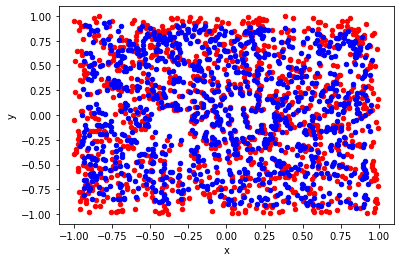

In [111]:
ax = x_0.plot(kind = 'scatter', x = 'x', y = 'y', color='r')

x_1.plot(kind = 'scatter', x = 'x', y = 'y', color='b', ax=ax)


### Part 1

In [11]:
delta_t = 0.1

In [12]:
def compute_finite_difference(x_0: pd.DataFrame, x_1: pd.DataFrame, delta_t: float = 0.1)-> pd.DataFrame:
    """
    computes finite difference between x_0 and x_1 for a given delta_t

    Args:
        x_0 (pd.DataFrame): points at time t=0
        x_1 (pd.DataFrame): points at time delta_t
        delta_t (float):

    Returns: v_k, approximation of the vector field
    """
    v_k = x_1 - x_0
    v_k /= delta_t
    return v_k

v_k = compute_finite_difference(x_0, x_1, delta_t)

In [13]:
print(v_k.shape)

(1000, 2)


In [16]:
print(v_k)

            x         y
0    0.184099 -0.344892
1    0.401757  0.842201
2    0.159606  1.108256
3    0.238062  0.586752
4    0.119905  0.021439
..        ...       ...
995 -0.383614 -0.238036
996  0.048802 -0.510558
997 -0.317013 -0.174528
998  0.464273 -0.336424
999  0.670157 -0.420306

[1000 rows x 2 columns]


approximate A with supervised learning problem

In [49]:
def compute_closed_form_linear_supervised_learning(x: pd.DataFrame, f: pd.DataFrame) -> pd.DataFrame:
    """
    computes closed form solution for linear functions that minimizes the least-squares error
    Args:
        x (pd.DataFrame):
        f (pd.DataFrame):

    Returns: A, closed form solution
    """

    x_t = x.T
    cov = x_t @ x
    cov_inv = pd.DataFrame(np.linalg.pinv(cov.values), cov.columns, cov.index)

    result = cov_inv @ x_t
    result = result @ f

    return result

In [51]:
A = compute_closed_form_linear_supervised_learning(x_0, v_k)

In [52]:
print(A)

          x         y
x -0.493552 -0.463823
y  0.231912 -0.957376


In [ ]:
y = x_0 @ A
y = y - v_k
print(y)

### Part 2

solve linear system: x_dot = Ax

In [105]:
def deriv(x: np.ndarray, t: np.ndarray, A: np.ndarray, dim1: int, dim2: int) -> np.ndarray:
    """
    TODO
    Args:
        x ():
        t ():
        A ():
        dim1 ():
        dim2 ():

    Returns:

    """
    x = x.reshape(dim1, dim2)
    x_dot = x @ A
    return x_dot.reshape(-1)

def solve_ode(t: np.array, A: pd.DataFrame, x: pd.DataFrame) -> pd.DataFrame:
    """
    TODO
    Args:
        A (pd.DataFrame):
        x (pd.DataFrame):

    Returns:

    """
    dim1 = x.shape[0]
    dim2 = x.shape[1]
    initial = x.to_numpy().reshape(-1)
    sol = odeint(deriv, initial, t, args=(A.to_numpy(),dim1, dim2))
    return sol

In [106]:
time = np.linspace(0, 0.1, 2)

x_1_head = solve_ode(time, A, x_0)[1].reshape(x_0.shape[0], x_0.shape[1])
print(x_1_head)
print(x_1_head.shape)


[[-0.14837719  0.40735825]
 [-0.95964718 -0.31592268]
 [-0.68969325 -0.71000842]
 ...
 [ 0.56185865 -0.12092361]
 [-0.58682433  0.62436327]
 [-0.87309114  0.85190138]]
(1000, 2)


In [107]:
diff = x_1 - x_1_head
print(diff)

            x         y
0    0.000831 -0.001198
1    0.000052  0.004808
2   -0.000834  0.005511
3   -0.000066  0.003257
4    0.000269  0.000365
..        ...       ...
995 -0.000675 -0.001956
996  0.000683 -0.002269
997 -0.000582 -0.001513
998  0.001507 -0.000540
999  0.002103 -0.000475

[1000 rows x 2 columns]


In [110]:
def mean_squared_error(x_head: np.ndarray, x: np.ndarray) -> float:
    """
    TODO
    Args:
        x_head ():
        x ():

    Returns:

    """
    result = x_head - x
    result = result ** 2
    return result.mean()

mse = mean_squared_error(x_1_head, x_1.to_numpy())
print("Mean Squared Error is: " + str(mse))

Mean Squared Error is: 4.9788089847790705e-06


### Part 3

In [131]:
time = np.linspace(0, 100, 2)

x_1_head = solve_ode(time, A, x_0)[1].reshape(x_0.shape[0], x_0.shape[1])
print(x_1_head)
print(x_1_head.shape)

[[-2.80940363e-14 -6.77533031e-14]
 [ 5.30291354e-13 -4.66132238e-13]
 [ 4.97658750e-13 -3.39579689e-13]
 ...
 [-2.36663675e-13  2.70017682e-13]
 [ 1.26992104e-13 -2.77300537e-13]
 [ 2.07529137e-13 -4.13301754e-13]]
(1000, 2)


                x             y
0   -2.809404e-14 -6.775330e-14
1    5.302914e-13 -4.661322e-13
2    4.976588e-13 -3.395797e-13
3    3.467587e-13 -2.937105e-13
4    7.298034e-14 -9.323496e-14
..            ...           ...
995 -2.963411e-13  3.321030e-13
996 -1.629219e-13  6.568340e-14
997 -2.366637e-13  2.700177e-13
998  1.269921e-13 -2.773005e-13
999  2.075291e-13 -4.133018e-13

[1000 rows x 2 columns]


<AxesSubplot:xlabel='x', ylabel='y'>

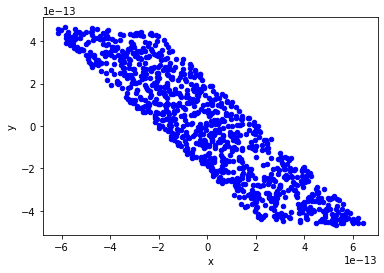

In [133]:
df = pd.DataFrame(data=x_1_head, columns=x_1.columns, index=x_1.index)
print(df)

df.plot(kind = 'scatter', x = 'x', y = 'y', color='b')

In [169]:
time = np.linspace(0, 100, 1000)
initial = pd.DataFrame(data=[(10,10)])
print(initial)
x_1_head = solve_ode(time, A, initial)
#U, V = x_1_head.T
#print(U)

    0   1
0  10  10


<AxesSubplot:xlabel='x'>

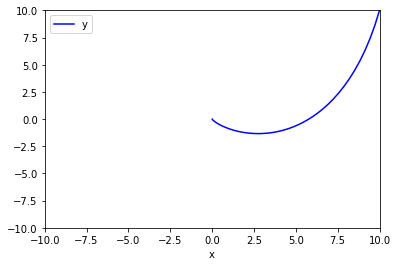

In [170]:
# plot trajectory of initial point (10,10)
df = pd.DataFrame(data=x_1_head, columns=x_1.columns)

df.plot(kind = 'line', x = 'x', y = 'y', color='b', xlim=(-10,10), ylim=(-10,10))

In [141]:
# TODO phase portrait
def plot_phase_portrait(
    mesh_tuple: np.ndarray,
    flow_tuple: np.ndarray,
    **kwargs,
):
    """
    Plot phase portrait.
    Args:
        mesh_tuple ():
        flow_tuple ():
        **kwargs ():

    Returns:

    """
    (X1, X2) = mesh_tuple
    (U, V) = flow_tuple

    _, ax = plt.subplots(1, 1)

    ax.streamplot(X1, X2, U, V, density=1.0, **kwargs)
    ax.set_aspect("equal")
    ax.set_xlim([X1[0, 0], X1[-1, -1]])
    ax.set_ylim([X2[0, 0], X2[-1, -1]])

